In [11]:
!ls

cyclegan.ipynb	discriminator_x.h5  generator_f.h5  __init__.py  temp
cyclegan.py	discriminator_y.h5  generator_g.h5  __pycache__  utils


In [12]:
from cyclegan import *

In [13]:
generator_g = generator()
generator_f = generator()

discriminator_x = discriminator()
discriminator_y = discriminator()

In [14]:
def load_model():
    generator_g = generator()
    generator_f = generator()

    discriminator_x = discriminator()
    discriminator_y = discriminator()
    
    generator_g.load_weights('generator_g.h5')
    generator_f.load_weights('generator_f.h5')
    discriminator_x.load_weights('discriminator_x.h5')
    discriminator_y.load_weights('discriminator_y.h5')
    
    return generator_g, generator_f, discriminator_x, discriminator_y 

In [15]:
def generate_images():
    # Sample images
    x = next(iter(test_x.shuffle(1000))).numpy()
    y = next(iter(test_y.shuffle(1000))).numpy()
    
    generator_g, generator_f, discriminator_x, discriminator_y = load_model()
    
    # Get predictions for those images
    y_hat = generator_g.predict(x.reshape((1, img_rows, img_cols, channels)))
    x_hat = generator_f.predict(y.reshape((1, img_rows, img_cols, channels)))
    
    plt.figure(figsize=(12, 12))

    images = [x[0], y_hat[0], y[0], x_hat[0]]

    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

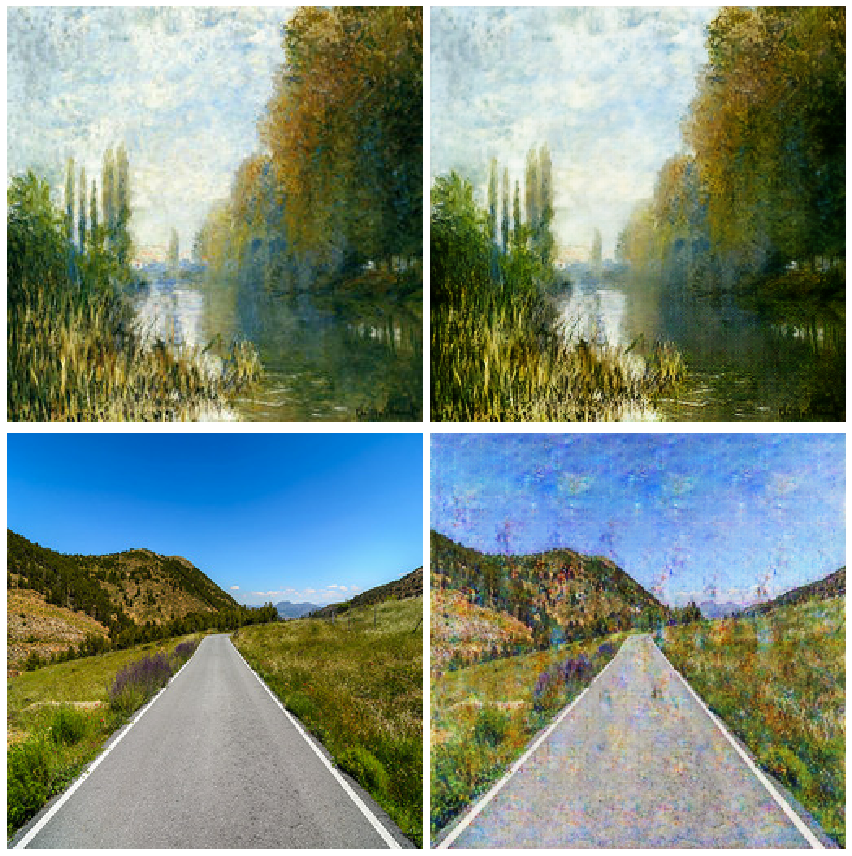

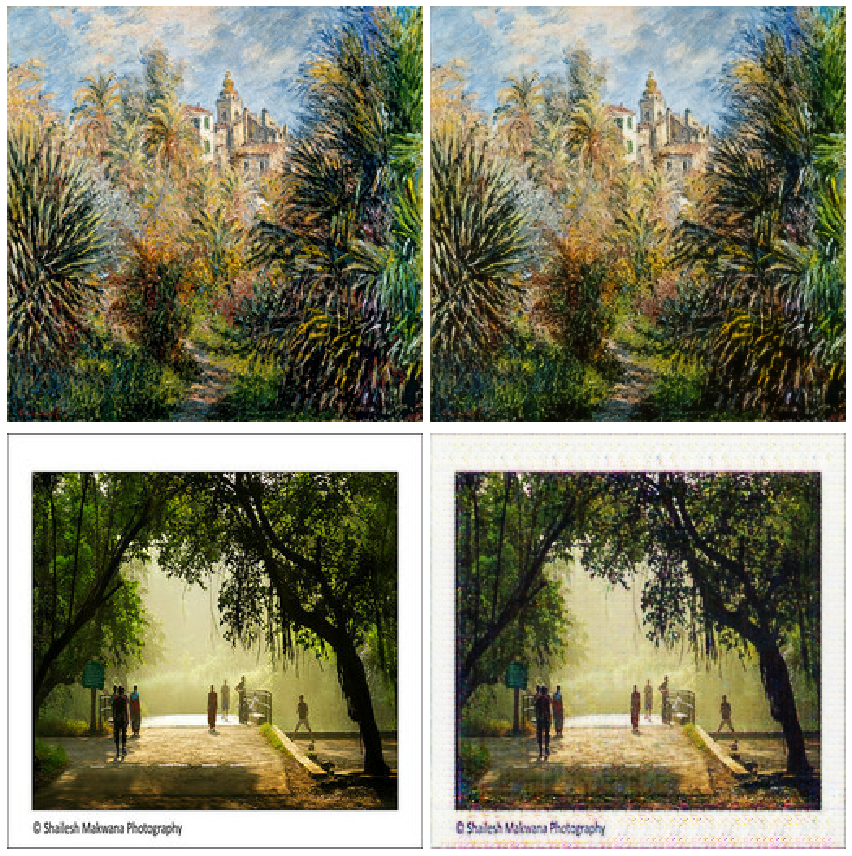

In [16]:
for _ in range(2):
    generate_images()